<center> <H1> Testing H1: Two-colour STORM data resemble one-colour STORM data </H1> </center>


                        *Code written by Timo Rey. Laboratory of Experimental Biophysics, EPFL*

                                            *Created for revisions in 2020*

#### Aims:
    To test whether technical differences may influence the two-colour STORM measurments (use of additional dye).

#### H0:
    The size-distribution of FASKTD2- and BrU-foci observed in two-colour experiments are drawn from the same distribution as the observations from one-colour STORM experiments.
    
#### Approach:
    1) Load descriptors for all granules from one-colour STORM measurements for BrU and FASTKD2.
    2) Load descriptors for all granules from two-colour STORM measurements.
    3) Comparison

# Initialize libraries & functions

In [1]:
#load libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
from statannot import add_stat_annotation
import PIL
from matplotlib.patches import Ellipse
from math import pi

In [2]:
# define column names:
cols = ['Rg', 'Ecc', 'Length', 'Width', 'Rg-half', 'k', 'Eps','ConvexHullArea','Locs']

# function to load the data:
def load_data(DATA_tot):
    file                         = directory + filename

    DATA                         = pd.read_csv(file, sep = ',', names = cols)
    DATA['Sigma']                = (DATA['Length']+DATA['Width'])
    DATA['FWHM']                 = (DATA['Sigma']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma [FWHM = 2*sqrt(2ln(2))*sigma]
    DATA['condition']            = cond
 
    DATA_tot                      = pd.concat([DATA_tot, DATA])
    
    return DATA_tot
    
def plot_stats_data(df, value, testtype):
    # create figure:
    f, axes = plt.subplots(1,1, sharex = False, figsize=(6, 10))
    
    # plot boxplots:
    sns.boxplot(data = df, x = "condition", y = value, order = sorter, palette=palette)
    # add significance indicators:
    add_stat_annotation(axes, data=df, x = "condition", y = value, order=sorter,
                    box_pairs = box_pairs,
                    test=testtype, text_format='star', loc='inside', verbose=2)
    
    # plot all data-points:
    sns.swarmplot(data = df, x = "condition", y = value,  size=3, color="grey", alpha=1, linewidth=0)
    # create legend:
    labels = []
    for i in sorter:
        newlabel = "%s: %r nm; n = %r" %(i, round(df[df["condition"] == i][value].median(), 1), len(df[df["condition"] == i]))
        labels.append(newlabel)
    # plot legend:
    axes.legend(labels)

In [3]:
# clean the variables:
DATA_tot                          = None

In [4]:
# give basic path:
base_dir = 'C:/Users/Public/Documents/03_Architecture/01_STORM_1C/03_ProcessedData/'

# Load 1C data

### BrU

In [5]:
Probe = '1hBrU'
cond = 'mtRNA'

In [6]:
# 07.09.2018
Date  = '20180907'

directory = base_dir + 'COS7_' + Probe + '_' + Date + '/filtered_MRGs/'
filename  = 'COS7_'+Probe+'_'+Date+'.csv'
DATA_tot  = load_data(DATA_tot)

In [7]:
# 13.09.2018
Date  = '20180913'

directory = base_dir + 'COS7_' + Probe + '_' + Date + '/filtered_MRGs/'
filename  = 'COS7_'+Probe+'_'+Date+'.csv'
DATA_tot  = load_data(DATA_tot)

In [8]:
# 08.11.2018
Date  = '20181108'

directory = base_dir + 'COS7_' + Probe + '_' + Date + '/filtered_MRGs/'
filename  = 'COS7_'+Probe+'_'+Date+'.csv'
DATA_tot  = load_data(DATA_tot)

In [9]:
# 14.11.2019
Date  = '20191114'

directory = base_dir + 'COS7_' + Probe + '_' + Date + '/filtered_MRGs/'
filename  = 'COS7_'+Probe+'_'+Date+'.csv'
DATA_tot  = load_data(DATA_tot)

In [10]:
# 12.12.2019
Date  = '20191212'

directory = base_dir + 'COS7_' + Probe + '_' + Date + '/filtered_MRGs/'
filename  = 'COS7_'+Probe+'_'+Date+'.csv'
DATA_tot  = load_data(DATA_tot)

### FASTKD2

In [11]:
Probe = 'D2'
cond = 'FASTKD2'

In [12]:
# 27.03.2019
Date  = '20190327'

directory = base_dir + 'COS7_' + Probe + '_' + Date + '/filtered_MRGs/'
filename  = 'COS7_'+Probe+'_'+Date+'.csv'
DATA_tot  = load_data(DATA_tot)

In [13]:
# 01.05.2019
Date  = '20190501'

directory = base_dir + 'COS7_' + Probe + '_' + Date + '/filtered_MRGs/'
filename  = 'COS7_'+Probe+'_'+Date+'.csv'
DATA_tot  = load_data(DATA_tot)

In [14]:
DATA_tot = DATA_tot.drop_duplicates()
len(DATA_tot)

728

# Load 2C data

In [15]:
# 0.1) create dictionary with all FOVs to analyse:
Dates = ['20181108', '20191212', '20200211', '20200219']
FOVs  = [[11],[2,3,5,7,8,12],[1,2],[9,10,12]]
# 0.2) specify common root-directory:
baseDir = "C:/Users/Public/Documents/03_Architecture/02_STORM_2C/03_processedData/"
# 0.3) create empty dataframe:
DATA_2C = pd.DataFrame()

In [16]:
for h in [1,2,3]:
    files = {Dates[h]: FOVs[h]}
    print(files)
    
    for i in files:                                                      # for every day
    # 1) For every FOV 'i', load data
        for j in files[str(i)]:                                          # for every FOV
            # 1.4) load cluster descriptors:
            clusterDir   = baseDir+"Output/"
            clusterFile  = clusterDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_TR_COS7_BrU-A647_FOV_' + str(j) + '_DBSCAN_filtered.csv'
            cluster_df   = pd.read_csv(clusterFile, sep = ',',names=['Rg_1', 'Ecc_1', 'Length_1', 'Width_1', 'ConvexHull_1', 'overlap [%]', 'Distance_CoM','Rg_2', 'Ecc_2', 'Length_2', 'Width_2', 'ConvexHull_2', 'roiID'])
            # Calculate remaining cluster descriptors:
            cluster_df['Sigma_1']                = (cluster_df['Length_1']+cluster_df['Width_1'])
            cluster_df['FWHM_1']                 = (cluster_df['Sigma_1']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma 
            cluster_df['Sigma_2']                = (cluster_df['Length_2']+cluster_df['Width_2'])
            cluster_df['FWHM_2']                 = (cluster_df['Sigma_2']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma
        
            DATA_2C                              = pd.concat([DATA_2C, cluster_df])

{'20191212': [2, 3, 5, 7, 8, 12]}
{'20200211': [1, 2]}
{'20200219': [9, 10, 12]}


##### for 2018:
adapt file-naming

In [17]:
files = {Dates[0]: [11]}
for i in files:                                                      # for every day
# 1) For every FOV 'i', load data
    for j in files[str(i)]:                                          # for every FOV
# 1.4) load cluster descriptors:
        clusterDir   = baseDir+"Output/"
        clusterFile  = clusterDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_COS7_BrU-A647_FOV_' + str(j) + '_DBSCAN_filtered.csv'
        cluster_df   = pd.read_csv(clusterFile, sep = ',',names=['Rg_1', 'Ecc_1', 'Length_1', 'Width_1', 'ConvexHull_1', 'overlap [%]', 'Distance_CoM','Rg_2', 'Ecc_2', 'Length_2', 'Width_2', 'ConvexHull_2', 'roiID'])
        # Calculate remaining cluster descriptors:
        cluster_df['Sigma_1']                = (cluster_df['Length_1']+cluster_df['Width_1'])
        cluster_df['FWHM_1']                 = (cluster_df['Sigma_1']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma 
        cluster_df['Sigma_2']                = (cluster_df['Length_2']+cluster_df['Width_2'])
        cluster_df['FWHM_2']                 = (cluster_df['Sigma_2']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma        
        
        DATA_2C                              = pd.concat([DATA_2C, cluster_df])

In [18]:
DATA_2C = DATA_2C.drop_duplicates()
len(DATA_2C)

26

# Compare and plot data

In [19]:
# define output directory:
outDir  = "C:/Users/Public/Documents/03_Architecture/02_STORM_2C/04_Analysis/"

In [20]:
# re-organise 2C data as 1C:
data_2r = DATA_2C[['Rg_1', 'Ecc_1', 'Length_1', 'Width_1', 'ConvexHull_1', 'FWHM_1', 'Sigma_1']]
data_2r.columns = ['Rg', 'Ecc', 'Length', 'Width', 'ConvexHullArea', 'FWHM', 'Sigma']
data_2r['condition'] = 'mtRNA_2C'

data_2d = DATA_2C[['Rg_2', 'Ecc_2', 'Length_2', 'Width_2', 'ConvexHull_2', 'FWHM_2', 'Sigma_2']]
data_2d.columns = ['Rg', 'Ecc', 'Length', 'Width', 'ConvexHullArea', 'FWHM', 'Sigma']
data_2d['condition'] = 'FASTKD2_2C'

C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# fuse 1C data together with 2C data into 1 df:
DATA_all = pd.DataFrame()
DATA_all = pd.concat([DATA_all, DATA_tot])
DATA_all = pd.concat([DATA_all, data_2r])
DATA_all = pd.concat([DATA_all, data_2d])
DATA_all = DATA_all.drop(['k', 'Eps', 'Rg-half', 'Locs'], axis = 1)
len(DATA_all)

780

In [22]:
# define order
sorter             = ["mtRNA","mtRNA_2C", "FASTKD2", "FASTKD2_2C"]
DATA_all.condition = DATA_all.condition.astype("category")
DATA_all.condition.cat.set_categories(sorter, inplace=True)
DATA_all           = DATA_all.sort_values("condition")

In [23]:
# choose statistical test:
test           = 'Mann-Whitney'

### Make plots:

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mtRNA v.s. mtRNA_2C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.834e-04 U_stat=3.235e+03
FASTKD2 v.s. FASTKD2_2C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.160e-01 U_stat=3.039e+03
mtRNA_2C v.s. FASTKD2_2C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.371e-03 U_stat=1.460e+02


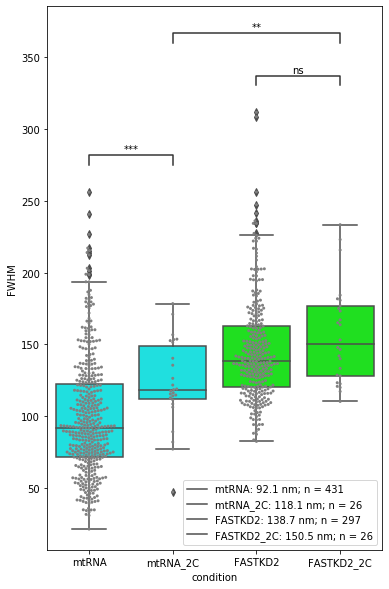

In [24]:
value          = "FWHM"
palette        = ["cyan", "cyan", "lime", "lime"]
box_pairs      = [("mtRNA", "mtRNA_2C"), ("FASTKD2", "FASTKD2_2C"), ("mtRNA_2C", "FASTKD2_2C")]

test           = 'Mann-Whitney'
data           = DATA_all

plot_stats_data(data, value, test)
plt.savefig(outDir + value + '_' + test + '_1Cvs2C.svg')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mtRNA v.s. mtRNA_2C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.560e-01 U_stat=6.624e+03
FASTKD2 v.s. FASTKD2_2C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.534e+03
mtRNA_2C v.s. FASTKD2_2C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=3.630e+02


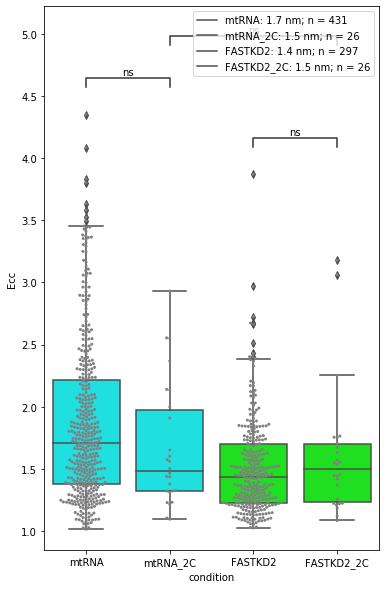

In [25]:
value          = "Ecc"
palette        = ["cyan", "cyan", "lime", "lime"]
box_pairs      = [("mtRNA", "mtRNA_2C"), ("FASTKD2", "FASTKD2_2C"), ("mtRNA_2C", "FASTKD2_2C")]

test           = 'Mann-Whitney'
data           = DATA_all

plot_stats_data(data, value, test)
plt.savefig(outDir + value + '_' + test + '_1Cvs2C.svg')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

mtRNA v.s. mtRNA_2C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.409e-04 U_stat=3.024e+03
FASTKD2 v.s. FASTKD2_2C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.652e-02 U_stat=2.593e+03
mtRNA_2C v.s. FASTKD2_2C: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.965e-05 U_stat=9.600e+01


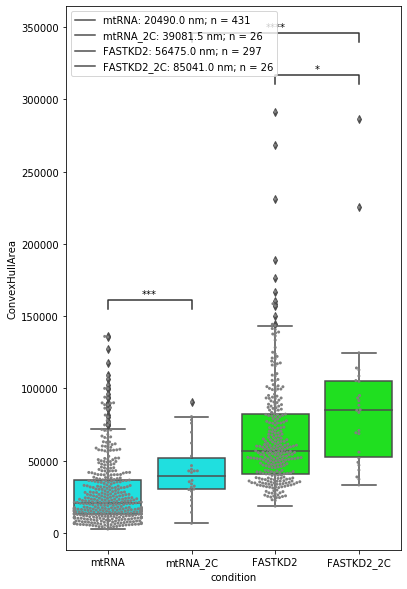

In [26]:
value          = "ConvexHullArea"
palette        = ["cyan", "cyan", "lime", "lime"]
box_pairs      = [("mtRNA", "mtRNA_2C"), ("FASTKD2", "FASTKD2_2C"), ("mtRNA_2C", "FASTKD2_2C")]

test           = 'Mann-Whitney'
data           = DATA_all

plot_stats_data(data, value, test)
plt.savefig(outDir + value + '_' + test + '_1Cvs2C.svg')